## POS TAGGING AND NAME ENTITY RECOGNITION


In [2]:
#Import all required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import nltk 
import string
import re
%matplotlib inline

In [3]:
#import using pandas 
tweets = pd.read_csv('Tweets/TweetRaw.csv', sep=',',
                           names=["date", "tweet"])

##                                        POS Tagging


In [21]:
from nltk import pos_tag

In [22]:
tagged_tweets = cleaned_tweets['tweet'].map(pos_tag)


In [23]:
tagged_tweets.head()


0    [(comedycentralke, NN), (words, NNS), (kill, V...
1    [(little, JJ), (luhya, NN), (remains, VBZ), (a...
2    [(cheernatwildcat, NN), (kill, VB), (battle, N...
3    [(homeboyzradio, NN), (hbr, NN), (luv, NN), (d...
4    [(hangoutfriday, NN), (hahaha, VB), (ball, NN)...
Name: tweet, dtype: object

In [24]:
#function to count tags
def count_tags(tweet_with_tags):
    tag_count = {}
    for word, tag in tweet_with_tags:
        if tag in tag_count:
            tag_count[tag] += 1
        else:
            tag_count[tag] = 1
    return(tag_count)
tagged_tweets.map(count_tags).head()

0                {'NN': 3, 'NNS': 1, 'VB': 1, 'JJ': 2}
1      {'JJ': 2, 'NN': 1, 'VBZ': 1, 'RB': 1, 'NNS': 1}
2                                   {'NN': 5, 'VB': 1}
3    {'NN': 5, 'VBD': 1, 'JJ': 1, 'RB': 1, 'VBP': 1...
4                          {'NN': 5, 'VB': 1, 'JJ': 2}
Name: tweet, dtype: object

In [25]:
tagged_tweets = pd.DataFrame(tagged_tweets)
tagged_tweets['tag_counts'] = tagged_tweets['tweet'].map(count_tags)
tagged_tweets.head()

,tweet,tag_counts
0,"[(comedycentralke, NN), (words, NNS), (kill, V...","{'NN': 3, 'NNS': 1, 'VB': 1, 'JJ': 2}"
1,"[(little, JJ), (luhya, NN), (remains, VBZ), (a...","{'JJ': 2, 'NN': 1, 'VBZ': 1, 'RB': 1, 'NNS': 1}"
2,"[(cheernatwildcat, NN), (kill, VB), (battle, N...","{'NN': 5, 'VB': 1}"
3,"[(homeboyzradio, NN), (hbr, NN), (luv, NN), (d...","{'NN': 5, 'VBD': 1, 'JJ': 1, 'RB': 1, 'VBP': 1..."
4,"[(hangoutfriday, NN), (hahaha, VB), (ball, NN)...","{'NN': 5, 'VB': 1, 'JJ': 2}"


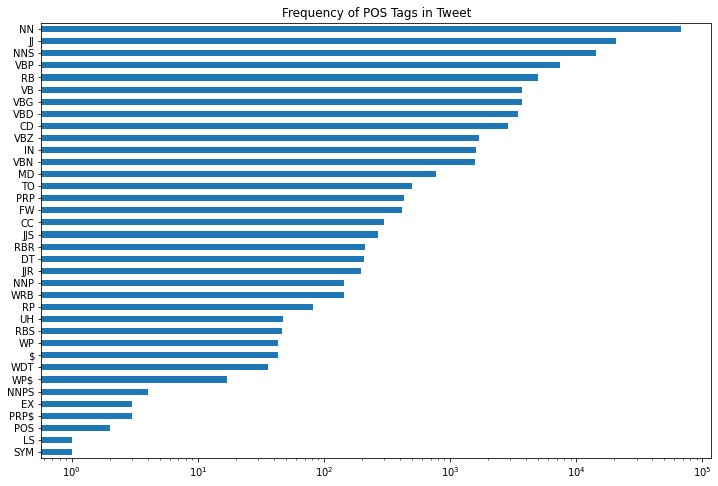

In [26]:
tag_set = list(set([tag for tags in tagged_tweets['tag_counts'] for tag in tags]))
for tag in tag_set:
    tagged_tweets[tag] = tagged_tweets['tag_counts'].map(lambda x: x.get(tag, 0))
title = 'Frequency of POS Tags in Tweet'    
tagged_tweets[tag_set].sum().sort_values().plot(kind='barh', logx=True, figsize=(12,8), title=title)

In [27]:
vocabulary = {}
for row in tagged_tweets['tweet']:
    for word, tag in row:
        if word in vocabulary:
            if tag in vocabulary[word]:
                vocabulary[word][tag] += 1
            else:
                vocabulary[word][tag] = 1
        else:
            vocabulary[word] = {tag: 1}
vocabulary_df = pd.DataFrame.from_dict(vocabulary, orient='index')
vocabulary_df.fillna(value=0, inplace=True)
tag = 'NNP' # NNP: Proper noun, singular 
vocabulary_df.sort_values(by=tag, ascending=False).head(10) # top 10 words for a given tag

,NN,VBP,NNS,VB,MD,NNP,JJ,VBZ,VBN,FW,...,VBG,WDT,NNPS,UH,TO,SYM,PRP$,POS,WP$,LS
kama,139.0,8.0,3.0,1.0,0.0,8.0,1.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
kenya,287.0,70.0,51.0,50.0,0.0,7.0,46.0,13.0,4.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
za,61.0,23.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ya,332.0,5.0,6.0,0.0,0.0,6.0,18.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
xtiandela,5.0,0.0,0.0,0.0,0.0,5.0,3.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
kina,4.0,0.0,1.0,3.0,0.0,5.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
kikuyus,861.0,134.0,218.0,132.0,0.0,4.0,138.0,14.0,6.0,17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
xd,9.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
kambas,129.0,15.0,28.0,16.0,0.0,3.0,27.0,8.0,2.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
kamba,69.0,5.0,11.0,6.0,0.0,3.0,13.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


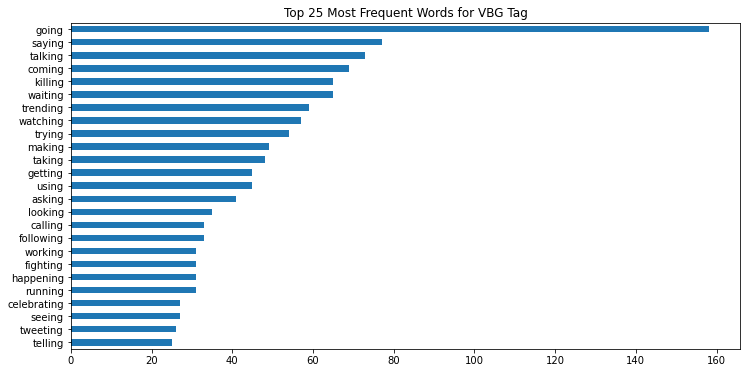

In [28]:
size = 25
tag = 'VBG' # VBG: Verb, gerund or present participle
title = 'Top {} Most Frequent Words for {} Tag'.format(size, tag)
vocabulary_df[tag].sort_values().tail(size).plot(kind='barh', figsize=(12,6), title=title)

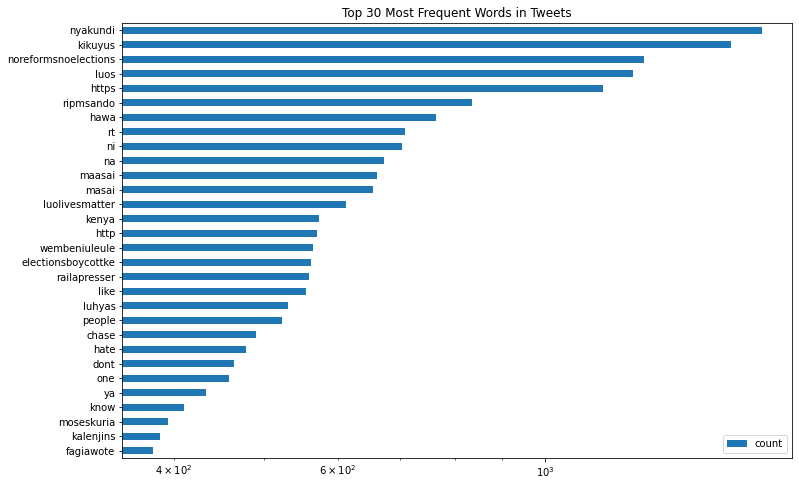

In [29]:
vocab = {}
for row in tagged_tweets['tweet']:
    for word, tag in row:
        if word in vocab:
            vocab[word] += 1
        else:
            vocab[word] = 1

vocab_df = pd.DataFrame.from_dict(vocab, orient='index')
vocab_df.columns = ['count']
size = 30
title = 'Top {} Most Frequent Words in Tweets'.format(size)
vocab_df.sort_values(by='count').tail(size).plot(kind='barh', logx=True, figsize=(12,8), title=title)

##                                       Name Entity Recognition

In [30]:
import spacy
import en_core_web_sm
nlp = en_core_web_sm.load()

In [31]:
#function to extract named_ent

def extract_named_ents(text):
    """Extract named entities, and beginning, middle and end idx using spaCy's out-of-the-box model. 
    
    Keyword arguments:
    text -- the actual text source from which to extract entities
    
    """
    return [(ent.text, ent.start_char, ent.end_char, ent.label_) for ent in nlp(text).ents]

In [32]:
tweets['tweet'].apply(extract_named_ents)  

0                                  [(Ugali, 53, 58, NORP)]
1                               [(Sitokingi, 46, 55, ORG)]
2                           [(this weekend, 35, 47, DATE)]
3        [(@HomeboyzRadio H.B.R luv dat luhya, 0, 34, P...
4                                  [(Luhyas, 45, 51, ORG)]
                               ...                        
20016        [(Hao ni wachinese wakikuyu, 48, 73, PERSON)]
20017                                                   []
20018    [(Luos, 58, 62, PERSON), (Kikuyus, 67, 74, PER...
20019    [(kikuyus n, 17, 26, PERSON), (kikuyu, 49, 55,...
20020    [(Kikuyus, 16, 23, PERSON), (Luos, 49, 53, PER...
Name: tweet, Length: 20021, dtype: object

as you can see some of the texts have been Recognized